# All sorts of Sorts

## What is this?
<font color=green>
    <p>
        This is a notebook with implementations, analyses, and animations of popular sorting algorithms. All of the sorting algorithms run on an array (each get their own copy) of randomly generated integers between 0 and 100.
    </p>
</font>

<p>
    Algorithms include:
</p>
<ul>
    <li><b>Bubble sort</b></li>
    <li><b>Insertion sort</b></li>
    <li><b>Selection sort</b></li>
    <li><b>Mergesort</b></li>
    <li><b>Quicksort</b></li>
    <li><b>Heap sort</b></li>
    <li><b>Bucket sort</b></li>
    <li><b>Topological sorting</b></li>
</ul>

### Glossary
<p>
    <b>Time complexity:</b> the computational complexity describing the time it takes to run an algorithm.
</p>
<p>
    <b>Space complexity:</b> the computational complexity describing the amount of working memory it takes to run an algorithm.
</p>
<p>
    <b>Stable:</b>  a stable sorting algorithm is one where the relative order of array elements of equal value is preserved. Unstable sorting algorithms, on the other hand, don't.
</p>
<p>
    <b>In-place:</b> an in-place algorithm is one that does not need extra space and produces an output in the same memory that contains the input data by manipulating the data 'in-place'.
</p>

In [1]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import copy

In [2]:
%matplotlib widget
arr = np.random.randint(low=0, high=100, size=50)

In [3]:
def animate_sort(sort_fn) -> FuncAnimation:
    '''
    Wrapper function for animating the sorting functions in this notebook.
    Plots a bar chart of the array mentioned above over the iterations of each sorting function.
    
    Args:
        sort_fn: the sorting function to call on the array
        
    Returns:
        FuncAnim: for animation
    '''
    fig = plt.figure()

    x = range(len(arr))
    frames = sort_fn(copy.deepcopy(arr))
    n = len(frames) # Number of frames
    barcollection = plt.bar(x, frames[0])

    def animate(i):
        y = frames[i]
        for i, b in enumerate(barcollection):
            b.set_height(y[i])

    anim = FuncAnimation(fig, animate, repeat=False, blit=True, frames=n, interval=20)
    return anim

## Bubble sort

<p>
    <strong>Description</strong>
</p>
<p>
    The poster child for inefficient but feasible sorting. Bubble sort iterates through the items in the list and the items bubble up (or down) to their respective positions. This is done by repeatedly swapping an element to its position.
</p>

<p>
    <strong>Analysis</strong>
</p>
<p>
    <ul>
        <li>
            <strong>Time:</strong>
            <ul>
                <li><strong>Worst:</strong> O(n^2)</li>
                <li><strong>Best:</strong> O(n) [array is already sorted]</li>
                <li><strong>Average:</strong> O(n^2)</li>
            </ul>
        </li>
        <li>
            <strong>Space:</strong> O(1)
        </li>
        <li>
            <strong>Stable:</strong> Yes
        </li>
        <li>
            <strong>In-place:</strong> Yes
        </li>
    </ul>
</p>

In [4]:
def bubble_sort(arr: list) -> list:
    '''  
    Args:
        arr: the array to sort

    Returns:
        A list of frames for animation use
    '''
    frames = []
    n = len(arr)
    for i in range(n):
        for j in range(n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                frames.append(copy.deepcopy(arr))

    return frames

## Insertion sort

<p>
    <strong>Description</strong>
</p>
<p>
    This sorting algorithm builds the sorted array one item at a time. It looks at each element and swaps it into its correct place in the sorted subarray. It is inefficient for big lists but efficient for small ones. It is also efficient for data sets that are already nearly sorted in which the algorithm runs at a time complexity of O(kn) where each element in the input is no more than k places away from its sorted position.
</p>

<p>
    <strong>Analysis</strong>
</p>
<p>
    <ul>
        <li>
            <strong>Time:</strong>
            <ul>
                <li><strong>Worst:</strong> O(n^2) [array is sorted in reverse order]</li>
                <li><strong>Best:</strong> O(n) [array is already sorted]</li>
                <li><strong>Average:</strong> O(n^2)</li>
            </ul>
        </li>
        <li>
            <strong>Space:</strong> O(1)
        </li>
        <li>
            <strong>Stable:</strong> Yes
        </li>
        <li>
            <strong>In-place:</strong> Yes
        </li>
    </ul>
</p>

In [4]:
def insertion_sort(arr: list) -> list:
    ''' 
    Args:
        arr: the array to sort

    Returns:
        A list of frames for animation use
    '''
    frames = []
    n = len(arr)
    for i in range(1,n):
        cand = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > cand:
            arr[j+1] = arr[j]
            j -= 1
            frames.append(copy.deepcopy(arr))
        arr[j+1] = cand

    return frames

## Selection sort

In [1]:
def selection_sort(arr: list) -> list:
    '''
    Args:
        arr: the array to sort

    Returns:
        A list of frames for animation use
    '''
    frames = []
    n = len(arr)
    for i in range(n-1, -1, -1):
        swap_index = 0
        for j in range(i):
            if arr[j] > arr[swap_index]:
                swap_index = j
        
        arr[i], arr[swap_index] = arr[swap_index], arr[i]
        frames.append(copy.deepcopy(arr))
    
    return frames

<p>
    <strong>Description</strong>
</p>
<p>
    This sorting algorithm is the child's algorithm. It is simple but inefficient. Selection sort finds the largest (or smallest) value in the subarray and places it at the end (or front) of the subarray. Generally performs worse than insertion sort.
</p>

<p>
    <strong>Analysis</strong>
</p>
<p>
    <ul>
        <li>
            <strong>Time:</strong>
            <ul>
                <li><strong>Worst:</strong> O(n^2)</li>
                <li><strong>Best:</strong> O(n^2)</li>
                <li><strong>Average:</strong> O(n^2)</li>
            </ul>
        </li>
        <li>
            <strong>Space:</strong> O(1)
        </li>
        <li>
            <strong>Stable:</strong> Depends on implementation. In this one, yes.
        </li>
        <li>
            <strong>In-place:</strong> Yes
        </li>
    </ul>
</p>

## Mergesort

<p>
    <strong>Description</strong>
</p>
<p>
    A divide-and-conquer algorithm where you divide the array up and conquer the problem of sorting on each subdivision. Merge sort breaks up the array into smaller subarrays until there is only one element, then merges all of the elements in some order until we reach the size of the original array.
</p>

<p>
    <strong>Analysis</strong>
</p>
<p>
    <ul>
        <li>
            <strong>Time:</strong>
            <ul>
                <li><strong>Worst:</strong> O(nlogn)</li>
                <li><strong>Best:</strong> O(nlogn)</li>
                <li><strong>Average:</strong> O(nlogn)</li>
            </ul>
        </li>
        <li>
            <strong>Space:</strong> O(n)
        </li>
        <li>
            <strong>Stable:</strong> Yes
        </li>
        <li>
            <strong>In-place:</strong> Depends on the implementation. In this one, yes.
        </li>
    </ul>
</p>

In [5]:
def mergesort_aux(arr: list, left: int, right: int, frames: list) -> None:
    '''
    Args:
        arr: the array to sort
        left: the left boundary of the subarray
        right: the right boundary of the subarray
        frames: the animation frames
    '''
    if left < right:
        mid = (left + right) // 2
        mergesort_aux(arr, left, mid, frames)
        mergesort_aux(arr, mid + 1, right, frames)
        
        merge(arr, left, mid, right, frames)

def merge(arr: list, start: int, mid: int, end: int, frames: list) -> list:
    start2 = mid + 1
    
    while start <= mid and start2 <= end:
        if arr[start] <= arr[start2]:
            start += 1
        else:
            # value in second subarray is found to be less than the value in first subarray;
            # get its value and position in the array to shift into place
            val = arr[start2]
            index = start2
            
            # iterate down to the position at which the value belongs,
            # shifting the existing values up one
            while index != start:
                arr[index] = arr[index - 1]
                index -= 1
            
            # the array has now shifted all values up to this value's old index,
            # place the value in its rightful spot
            arr[start] = val
            # now that we've placed this value into its position,
            # continue iterating through the subarrays. 
            # We also move the midpoint up one since we shifted all the elements up one.
            start += 1
            mid += 1
            start2 += 1
            frames.append(copy.deepcopy(arr))

def mergesort(arr: list) -> list:
    '''Top-level function for animating mergesort'''
    frames = []
    mergesort_aux(arr, 0, len(arr) - 1, frames)
    return frames

## Quicksort

<p>
    <strong>Description</strong>
</p>
<p>
    As suggested by its name, this sorting algorithm is pretty quick! It performs better than mergesort and heap sort. Also, it is cache-efficient because of its contiguous access of memory.
    <br/><br/>
    It utilizes the concept of pivot partitioning so its efficiency depends on the choice of pivot. In this example, we use the median of three approach where we look at the first, middle and last element, choose the median of the three while sorting those three items. Sorting the three items will limit bad pivots choices in following recursive calls.
</p>

<p>
    <strong>Analysis</strong>
</p>
<p>
    <ul>
        <li>
            <strong>Time:</strong>
            <ul>
                <li><strong>Worst:</strong> O(n^2)</li>
                <li><strong>Best:</strong> O(nlogn)</li>
                <li><strong>Average:</strong> O(nlogn)</li>
            </ul>
        </li>
        <li>
            <strong>Space:</strong> O(logn)
        </li>
        <li>
            <strong>Stable:</strong> No
        </li>
        <li>
            <strong>In-place:</strong> Depends on the implementation. In this one, yes.
        </li>
    </ul>
</p>

In [9]:
def quicksort_aux(arr: list, lo: int, hi: int, frames: list) -> None:
    '''
    Args:
        arr: the array to sort
        lo: low index
        hi: high index
        frames: array for animation frames
    '''
    if lo < hi:
        pivot_index = partition(arr, lo, hi, frames)
        quicksort_aux(arr, lo, pivot_index-1, frames)
        quicksort_aux(arr, pivot_index+1, hi, frames)

def findMedianOfThree(arr: list, lo: int, hi: int) -> int:
    '''
    Finds the median between the the first, middle, and last element.
    Sorts the three values in-place to optimize pivot choices in later calls.
    '''
    mid = (lo+hi) // 2
    if arr[hi] < arr[lo]:
        arr[hi], arr[lo] = arr[lo], arr[hi]
    if arr[mid] < arr[lo]:
        arr[mid], arr[lo] = arr[lo], arr[mid]
    if arr[hi] < arr[mid]:
        arr[hi], arr[mid] = arr[mid], arr[hi]
        
    return mid

def partition(arr: list, lo: int, hi: int, frames: list) -> int:
    pivot_index = findMedianOfThree(arr, lo, hi)
    pivot = arr[pivot_index]
    arr[pivot_index], arr[hi] = arr[hi], arr[pivot_index]
    i = lo - 1
    j = lo

    for j in range(lo, hi):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            frames.append(copy.deepcopy(arr))
    
    arr[i+1], arr[hi] = arr[hi], arr[i+1]
    frames.append(copy.deepcopy(arr))
    return i+1

def quicksort(arr: list) -> list:
    '''Top-level function for animating quicksort'''
    frames = []
    quicksort_aux(arr, 0, len(arr) - 1, frames)
    return frames

## Heapsort

<p>
    <strong>Description</strong>
</p>
<p>
    A selection-type sorting algorithm where the array is represented as a binary tree with the heap property.
    The heapify procedure maintains the following property:
</p>
<ul>
    <li>
        in a MAX heap, for any given node C, if P is a parent of C, then the value of P is GREATER than C
    </li>
    <li>
        in a MIN heap, for any given node C, if P is a parent of C, then the value of P is LESS than C
    </li>
</ul>
<p>
    Heapifying an element takes O(logn) time, and doing this on every element in the array results in a total
    run time of O(nlogn). 
    <br/>
    The basic idea is to build a max heap and then pop off each value of the max heap and place it into the sorted subarray.
</p>

<p>
    <strong>Analysis</strong>
</p>
<p>
    <ul>
        <li>
            <strong>Time:</strong>
            <ul>
                <li><strong>Worst:</strong> O(nlogn)</li>
                <li><strong>Best:</strong> O(nlogn)</li>
                <li><strong>Average:</strong> O(nlogn)</li>
            </ul>
        </li>
        <li>
            <strong>Space:</strong> O(1)
        </li>
        <li>
            <strong>Stable:</strong> No
        </li>
        <li>
            <strong>In-place:</strong> Yes
        </li>
    </ul>
</p>

In [7]:
def heapsort(arr: list) -> list:
    '''
    Args:
        arr: the array to sort

    Returns:
        A list to use for animating
    '''
    frames = []
    # build the max heap
    n = len(arr)
    for i in range(n, -1, -1):
        heapify(arr, n, i, frames)
    
    # pop from the max heap, and place the value at the end of sorted subarray
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0, frames)

    return frames

def heapify(arr: list, n: int, index: int, frames) -> None:
    '''
    Looks at the current position in the array, compares its value to its children swapping with the largest child.
    
    Args:
        arr: array to sort
        n: used as boundary between unsorted and sorted subarray
        index: current index in the maxheap
    '''
    largest = index
    left = 2*index + 1
    right = 2*index + 2
    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right
    
    if largest == index:
        frames.append(copy.deepcopy(arr))
        return
    
    arr[index], arr[largest] = arr[largest], arr[index]
    frames.append(copy.deepcopy(arr))
    heapify(arr, n, largest, frames)

## Bucket sort

<p>
    <strong>Description</strong>
</p>
<p>
    Used mainly when the input is uniformly distributed over some range and we can parallelize computation.
    <br/><br/>
    The algorithm is as follows:
</p>
<ul>
    <li>create n empty buckets (lists)</li>
    <ul>
        <li>the key here is n logically distributes the array items</li>
        <li>ex. if arr = [.12, .16, .24, .56, .57, .9], then n = 4 and the buckets would look like: [[.12, .16], [.24], [.56, .57], [.9]]</li>
    </ul>
    <li>sort the individual buckets using some other sorting algorithm</li>
    <li>concatenate all of the buckets together</li>
</ul>

<p>
    <strong>Analysis</strong>
</p>
<p>
    <ul>
        <li>
            <strong>Time:</strong>
            <ul>
                <li><strong>Worst:</strong> O(n^2)</li>
                <li><strong>Average:</strong> O(n + (n^2 / k) + k) where, k = # of buckets
                <li><strong>Best:</strong> O(n) when k ~= n</li>
            </ul>
        </li>
        <li>
            <strong>Space:</strong> O(n*k)
        </li>
        <li>
            <strong>Stable:</strong> Depends on auxillary sort used. In this case, no.
        </li>
        <li>
            <strong>In-place:</strong> No
        </li>
    </ul>
</p>

In [4]:
def bucket_sort(arr: list) -> list:
    '''
    Args:
        arr: the array to sort

    Returns:
        A list to use for animating
    '''
    frames = []
    # in this case, we know that the input is an array of integers from 0 to 100, 
    # so we are going to allocate 10 buckets
    buckets = [[] for i in range(10)]
    for num in arr:
        index = num // 10
        buckets[index].append(num)
    
    frames.append(copy.deepcopy([num for sublist in buckets for num in sublist]))
    
    for bucket in buckets:
        frames += quicksort(bucket)
        frames.append(copy.deepcopy([num for sublist in buckets for num in sublist]))

    
    index = 0
    for bucket in buckets:
        for num in bucket:
            arr[index] = num
            index += 1
            frames.append(copy.deepcopy(arr))
    return frames

## Topological sorting

<p>
    <strong>Description</strong>
</p>
<p>
    A sorting algorithm for Directed Acyclic Graphs (DAGs) that linearly orders vertices such that for every directed edge uv, the vertex u comes before v in the ordering. Topological sorting of a graph is not possible if the graph is not a DAG.
    <br/><br/>
    First notion, we can modify the depth-first search (DFS) algorithm to find the Topological sort of a graph.
    <br/><br/>
    In DFS, a vertex is printed, then DFS is called recursively on its adjacent vertices. For Topological sorting, we want to hold back on printing and instead call the DFS algorithm on all the vertex's adjacent vertices before pushing it onto the stack. At the end of the algorithm, the stack will have contained the topological ordering of the graph because a vertex would have been pushed onto the stack only when all of its adjacent vertices (and their adjacent vertices and so forth) are already in the stack.
</p>

In [11]:
from collections import defaultdict

def top_driver():
    # in this adjacency list, every index is a vertex and their corresponding
    # list contain all its outgoing edges
    adj_list = [
        [1,2],
        [3],
        [4],
        [5],
        [],
        []
    ]

    visited = defaultdict(bool)
    n = len(adj_list)
    for i in range(n):
        visited[i] = False

    stack = []
    for i in range(n):
        topological_sort(adj_list, 0, visited, stack)
        
    for i in range(n-1, -1, -1):
        print(stack[i])
    
def topological_sort(g: list, u: int, visited: defaultdict, stack: list) -> None:
    if visited[u]:
        return
    
    visited[u] = True

    for v in g[u]:
        if not visited[v]:
            topological_sort(g, v, visited, stack)

    stack.append(u)

top_driver()

0
2
4
1
3
5


<IPython.core.display.Javascript object>


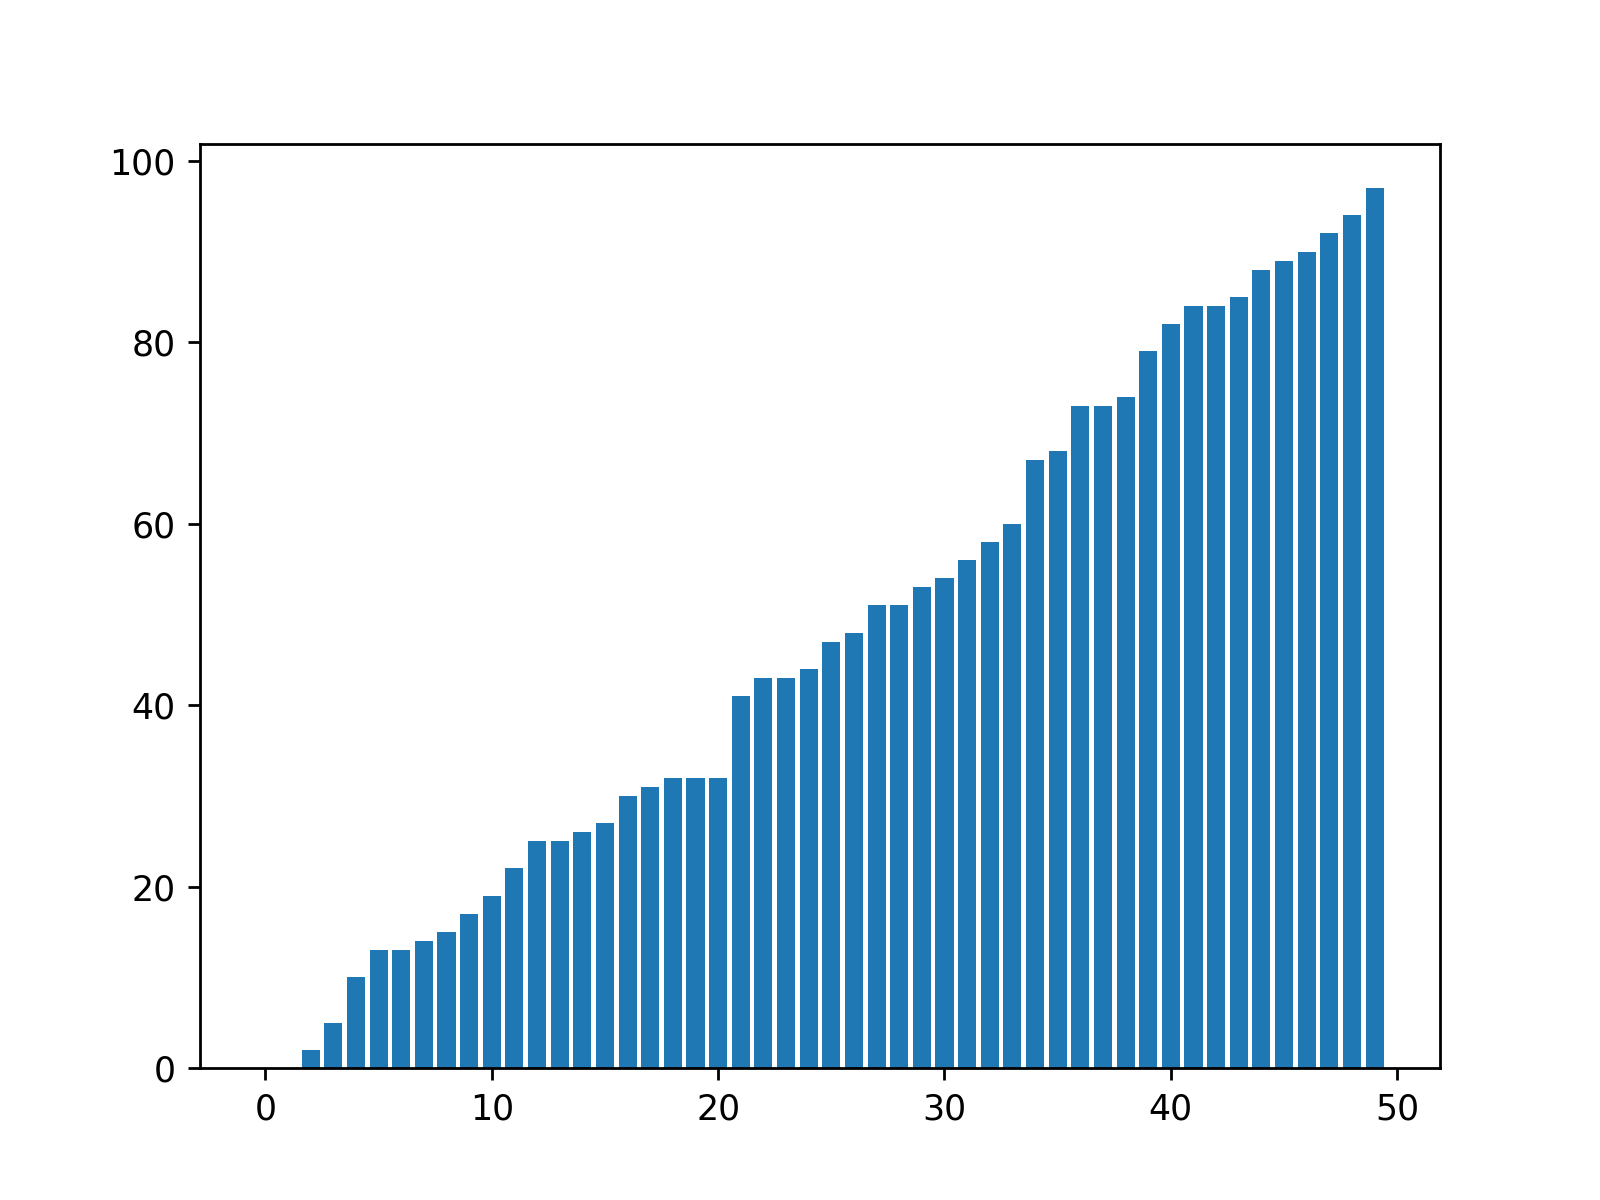

In [5]:
animate_sort(insertion_sort)

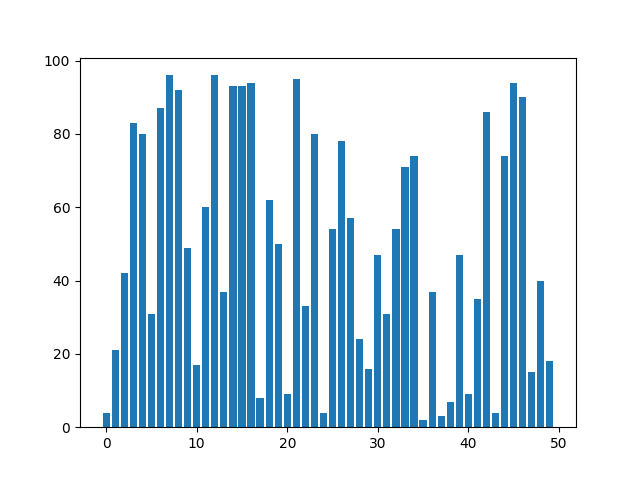

In [6]:
animate_sort(mergesort)

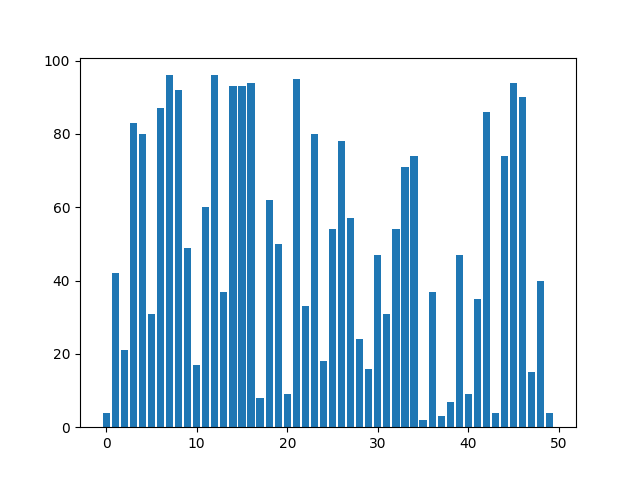

In [10]:
animate_sort(quicksort)

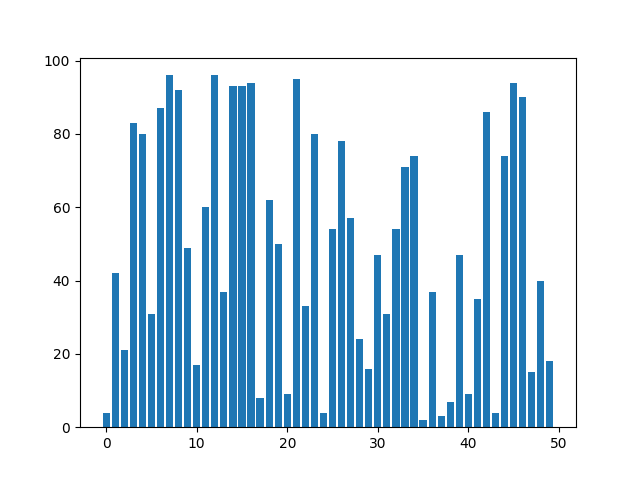

In [8]:
animate_sort(heapsort)

<IPython.core.display.Javascript object>


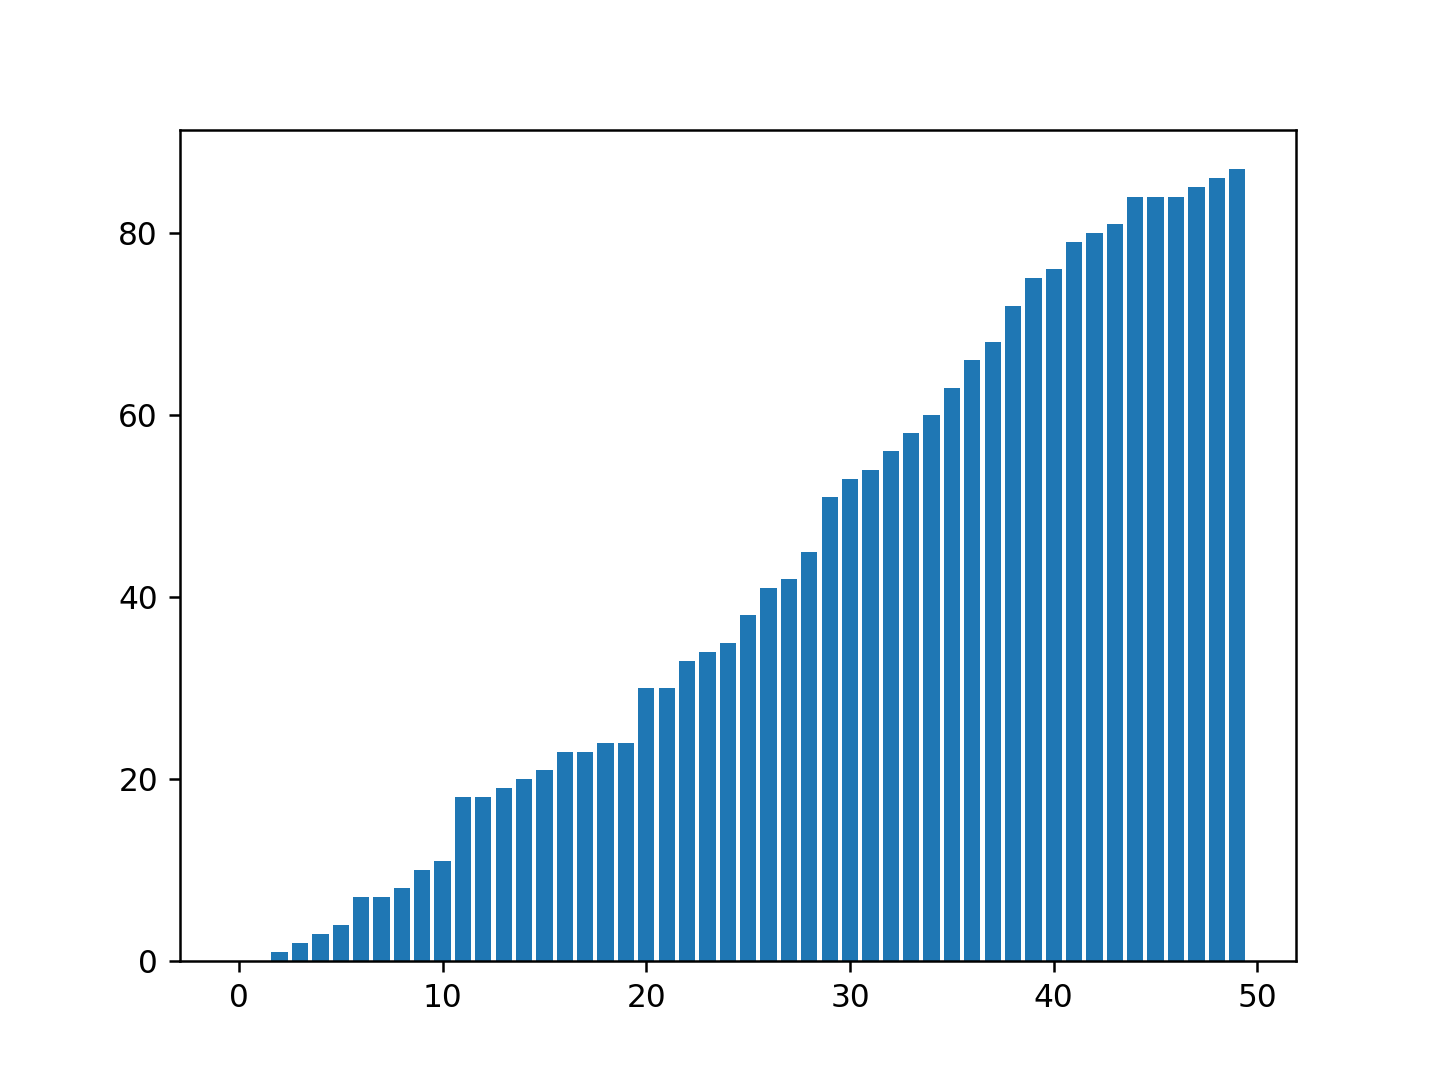

In [16]:
animate_sort(bucket_sort)

<IPython.core.display.Javascript object>


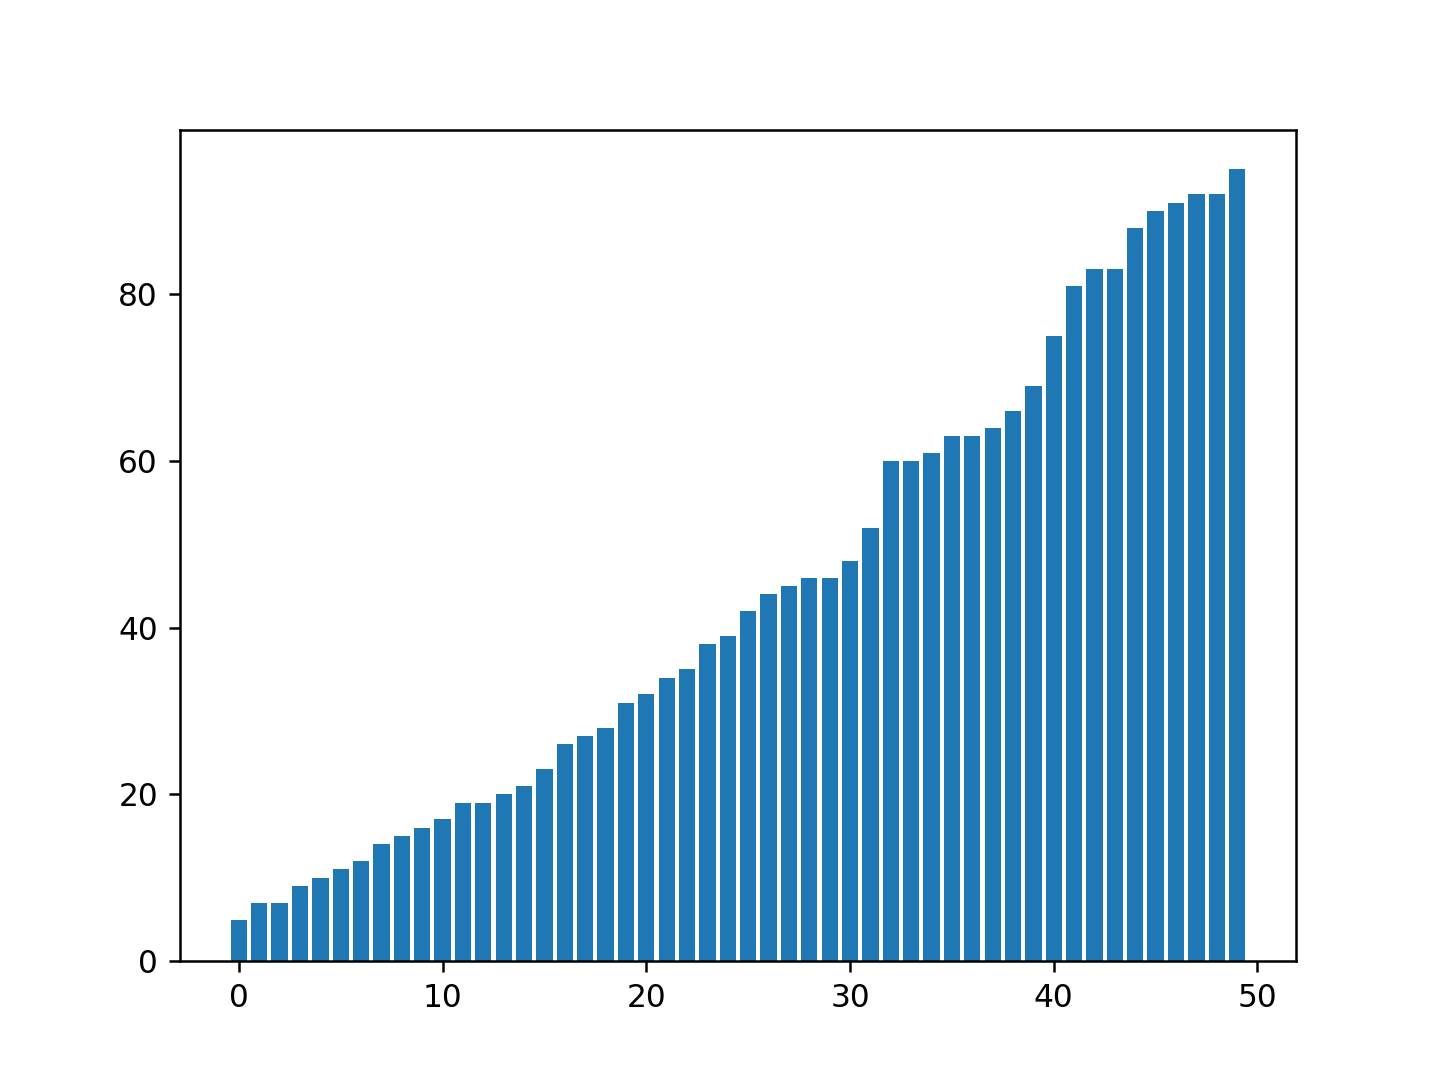

In [5]:
animate_sort(bubble_sort)

<IPython.core.display.Javascript object>


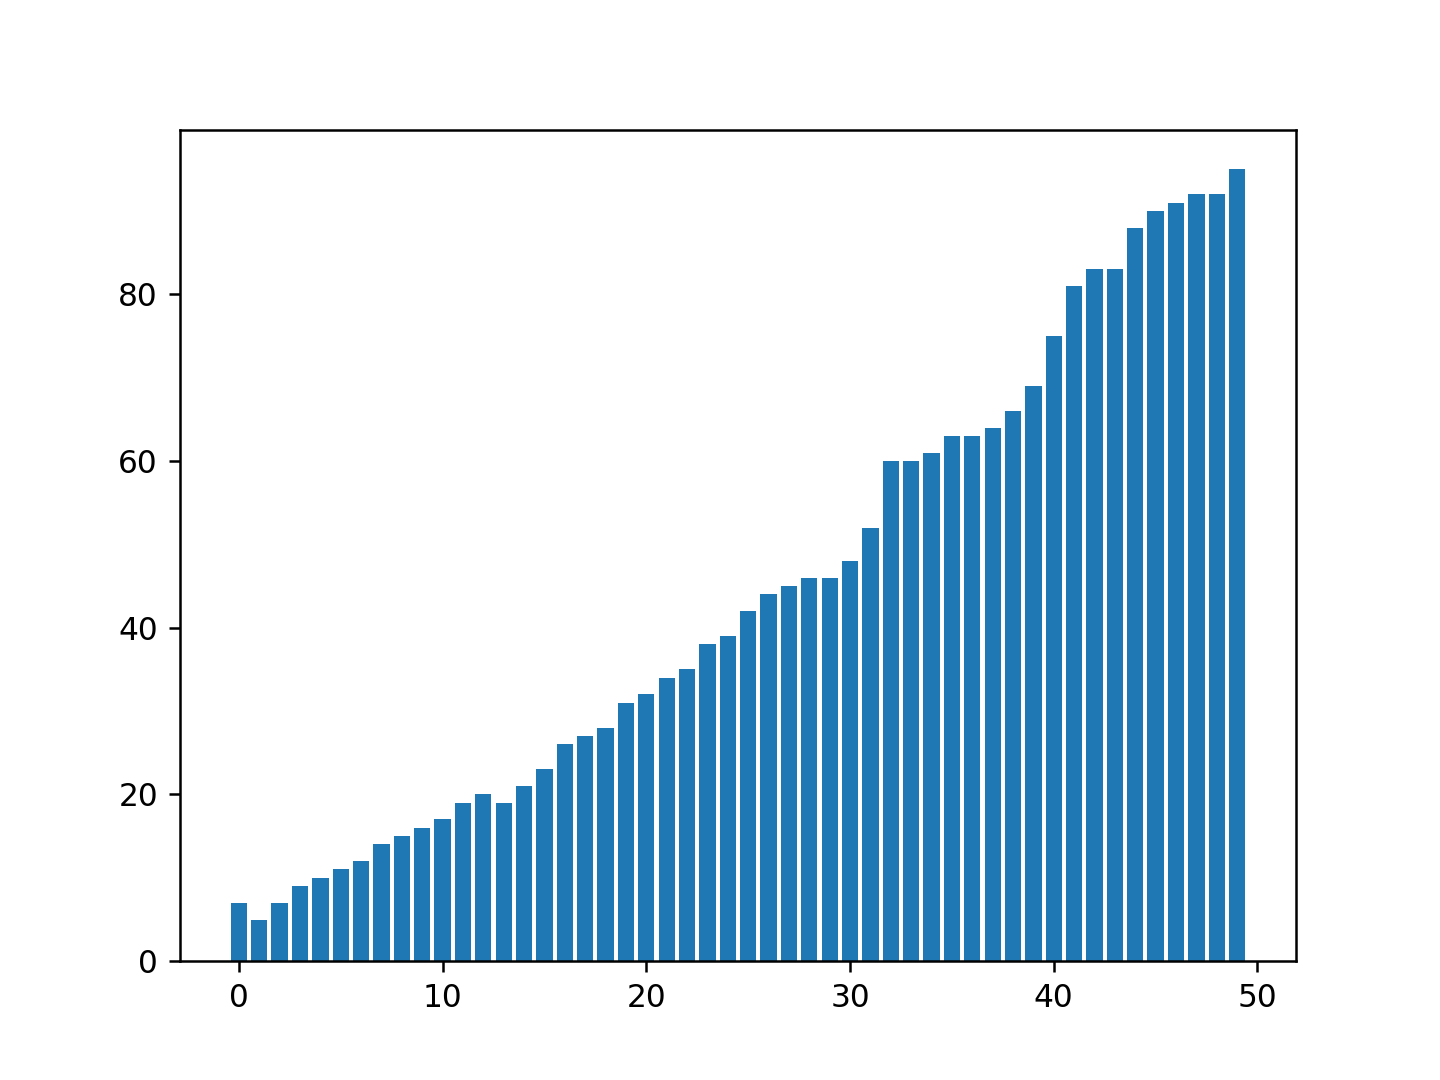

In [10]:
animate_sort(selection_sort)